In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import jax.numpy as jnp
from jax import grad, value_and_grad
from jax import vmap # for auto-vectorizing functions
from functools import partial # for use with vmap
from jax import jit # for compiling functions for speedup
from jax import random # stax initialization uses jax.random
from jax.experimental import stax # neural network library
from jax.experimental.stax import Conv, Dense, MaxPool, Relu, Flatten, LogSoftmax # neural network layers
import matplotlib.pyplot as plt # visualization
import numpy as np
from jax.experimental import optimizers
from jax.tree_util import tree_multimap
from faxutil import  two_phase_sine as twophase

In [3]:
seq_length = 100

def make_solver(param_func):
    def solve(x, params):
        k = twophase.two_phase_solve(param_func,x, params)
        return k
    return solve

In [4]:
# Sigmoid nonlinearity
def sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

def ReLU(x):
    """ Rectified Linear Unit (ReLU) activation function """
    return np.maximum(0, x)
def initial_params():
    return [
        np.random.randn(3,seq_length),#.astype(onp.float32),  # w1
        np.random.randn(1),#.astype(onp.float32),  # b1
        np.random.randn(3,),#.astype(onp.float32),  # w2
        np.random.randn()#.astype(onp.float32),  #b2
    ]
def net(params, x):
    w1, b1, w2, b2 = params
    hidden = jnp.tanh(jnp.dot(w1, x))
    val= sigmoid(jnp.dot(w2, hidden))
    return val

In [5]:
net_params= initial_params()
opt_init, opt_update, get_params = optimizers.adam(step_size=1e-2)
opt_state = opt_init(net_params)

In [6]:
net_params= initial_params()
opt_init, opt_update, get_params = optimizers.adam(step_size=1e-2)
opt_state = opt_init(net_params)

In [7]:
def sqrt_step(params):
    def _sqrt_step(inputs):
        x =  net(params, inputs)
        return   (targets - x)**2
    return _sqrt_step

In [8]:
def loss(params, inputs, targets):
    solver = make_solver(sqrt_step)
    predictions = solver(inputs, params)
    return jnp.mean((targets - predictions)**2)

In [9]:
@jit
def step(i, opt_state, x1, y1):
    p = get_params(opt_state)
    l,g = value_and_grad(loss)(p, x1, y1)
    return opt_update(i, g, opt_state),l

In [10]:

xrange_inputs = jnp.linspace(-3,3,seq_length).reshape((seq_length, 1)) # (k, 1)
targets = jnp.sin(xrange_inputs)

In [11]:
train_loss_log=[]
for i in range(2000):
    opt_state, l= step(i, opt_state, xrange_inputs, targets)
    train_loss_log.append(l)

In [12]:
net_params = get_params(opt_state)

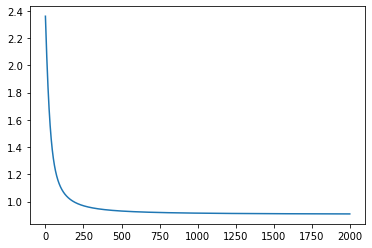

In [13]:
plt.plot(train_loss_log, label='train_loss_log')

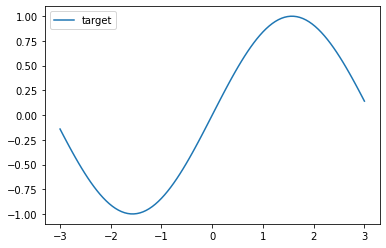

In [14]:

plt.plot(xrange_inputs, targets, label='target')
plt.legend()

In [15]:
solver = make_solver(sqrt_step)
predictions = solver(xrange_inputs, net_params)

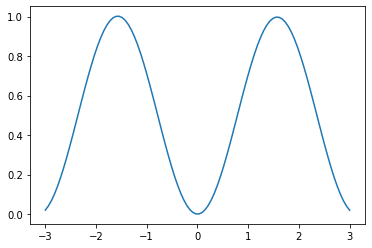

In [16]:
plt.plot(xrange_inputs, predictions, label='predictions')

In [17]:
train_loss_log

[DeviceArray(2.3609674, dtype=float32),
 DeviceArray(2.3248127, dtype=float32),
 DeviceArray(2.289298, dtype=float32),
 DeviceArray(2.2544398, dtype=float32),
 DeviceArray(2.2202494, dtype=float32),
 DeviceArray(2.1867392, dtype=float32),
 DeviceArray(2.1539192, dtype=float32),
 DeviceArray(2.1217988, dtype=float32),
 DeviceArray(2.0903852, dtype=float32),
 DeviceArray(2.0596836, dtype=float32),
 DeviceArray(2.0296986, dtype=float32),
 DeviceArray(2.0004334, dtype=float32),
 DeviceArray(1.9718893, dtype=float32),
 DeviceArray(1.9440652, dtype=float32),
 DeviceArray(1.9169606, dtype=float32),
 DeviceArray(1.890572, dtype=float32),
 DeviceArray(1.8648951, dtype=float32),
 DeviceArray(1.8399245, dtype=float32),
 DeviceArray(1.8156528, dtype=float32),
 DeviceArray(1.7920731, dtype=float32),
 DeviceArray(1.769176, dtype=float32),
 DeviceArray(1.7469517, dtype=float32),
 DeviceArray(1.725389, dtype=float32),
 DeviceArray(1.7044767, dtype=float32),
 DeviceArray(1.6842027, dtype=float32),
 Dev